In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
from random import randint
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import datetime
import talib

In [2]:
def CryptoDataCSV(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df1 = pd.read_json(url)
    df1.set_index('date',inplace=True)
    df1.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)
    
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    return df

tickers = ['USDT_BTC','USDT_ETC','USDT_XMR','USDT_ETH','USDT_DASH',
 'USDT_XRP','USDT_LTC','USDT_STR','USDT_REP','USDT_ZEC']


for x in tickers:
    CryptoDataCSV(x,14400)

    

Processed: USDT_BTC
Processed: USDT_ETC
Processed: USDT_XMR
Processed: USDT_ETH
Processed: USDT_DASH
Processed: USDT_XRP
Processed: USDT_LTC
Processed: USDT_STR
Processed: USDT_REP
Processed: USDT_ZEC


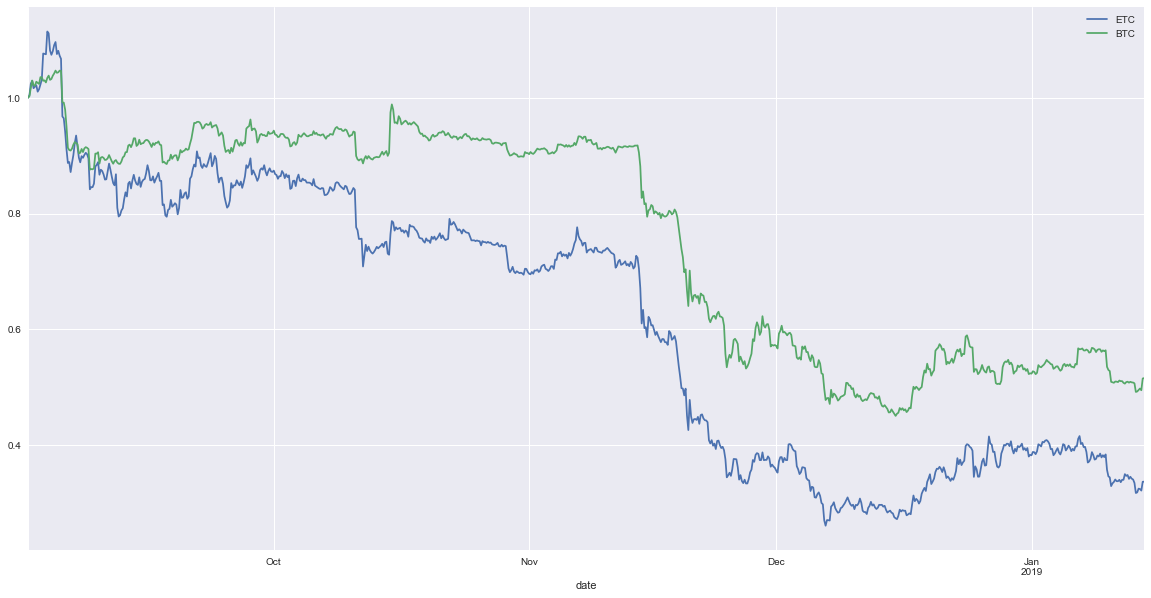

In [54]:
relative("USDT_ETC","2018-09-01 00:00:00")

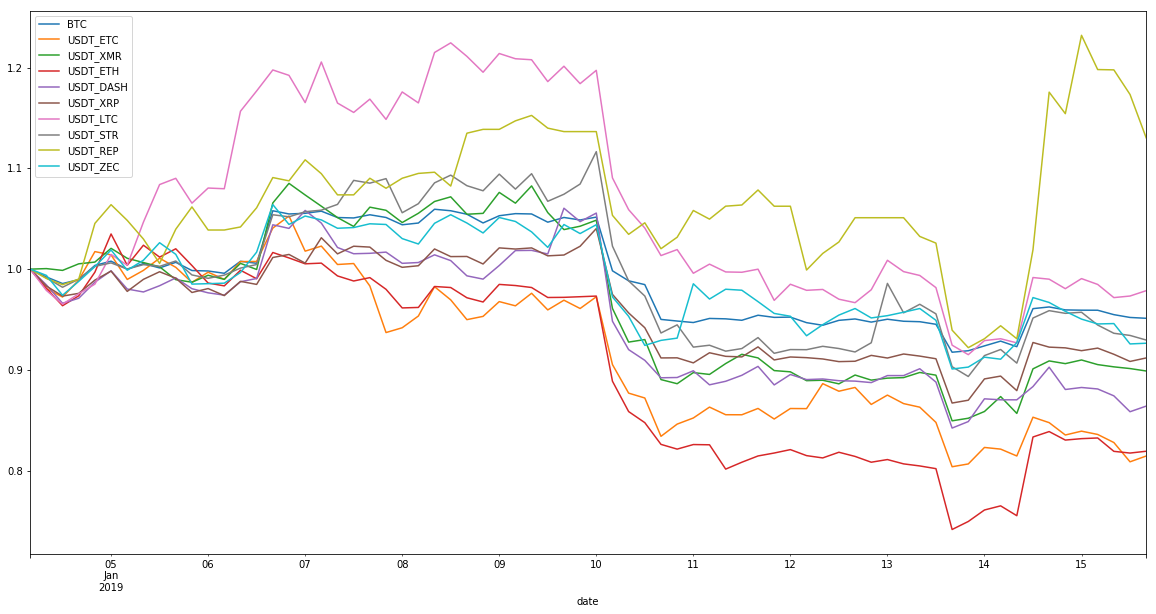

In [7]:
joined(tickers,"2019-01-04 00:00:00")

In [4]:
def retrieve_symbol_name(coin):
    col=['date','close']
    df=pd.read_csv(coin+'.csv',index_col='date')['close']
    df=pd.DataFrame(df)
    
    if coin in tickers:
        df.columns=[coin[5:]]
        df[coin[5:]+'_change']=df[coin[5:]].pct_change()
    df.index=pd.to_datetime(df.index)
    df=df.dropna()
    return df

def relative(coin,date):
    style.use("seaborn")
    BTC=set_period(retrieve_symbol_name('USDT_BTC'),date)
    Alt=set_period(retrieve_symbol_name(coin),date)
    BTC['based']=(BTC.iloc[:,0])/(BTC.iloc[0,0])
    Alt['based']=(Alt.iloc[:,0])/(Alt.iloc[0,0])
    Alt['based'].plot(label=coin[5:])
    BTC['based'].plot(label='BTC',figsize=(20,10))
    plt.legend(loc=1)
    plt.grid(True)
    plt.show()
    return 

    
def joined(tickers,date):
    df=pd.DataFrame(retrieve_symbol_name('USDT_BTC')['BTC'])
    tickers=tickers[1:]
    for x in tickers:
        df[x]=retrieve_symbol_name(x)[x[5:]]
    df=df.dropna()
    df=set_period(df,date)
    df=df/(df.iloc[0,:])
    df.plot(figsize=(20,10))
    plt.show()
    return 
        

def decline(df,percent):
    df_decline=df[df.iloc[:,-1]<percent]
    return df_decline


def rise(df,percent):
    df_rise=df[df.iloc[:,-1]>percent]
    return df_rise


def std_change(df,window,direction,n):
    if direction =='down':
        df = decline(df,-n*df.iloc[:,-1].rolling(window).std())
    else:
        df = rise(df,n*df.iloc[:,-1].rolling(window).std())
    return df


def modify_dates(df):
    
    new_dates = []
    for i in df.index:
        new_dates.append(datetime.strptime(i, '%Y-%m-%d %H:%M:%S'))
        
    df.index=new_dates
    return df

def mod_dates(df):
    df.index=pd.to_datetime(df.index)
    return df


def clean_df(coin, window,direction,n):
    df = std_change((retrieve_symbol_name(coin)),window,direction,n)
    return df

def set_period(df,date):
    
    df=df[df.index>date]
    return df



def mean_rev(df, event_dates,time_horiz):
    
    list00=[]
    list0=[]
    list1=[]
    list2=[]
    list3=[]
    list4=[]
    List=[list00,list0,list1,list2,list3,list4]
    for y in event_dates:
        if y+timedelta(hours=time_horiz*70) < df.index[-1]:
                               list00.append(y)
                               list0.append(df.iloc[:,0].loc[y])
                               list1.append(df.iloc[:,0].loc[y+timedelta(hours=time_horiz)])
                               list2.append(df.iloc[:,0].loc[y+timedelta(hours=time_horiz*5)])
                               list3.append(df.iloc[:,0].loc[y+timedelta(hours=time_horiz*30)])
                               list4.append(df.iloc[:,0].loc[y+timedelta(hours=time_horiz*70)])
    return List



In [82]:
def backtest(coin,window,time_horiz,direction,n):
    df=mean_rev(retrieve_symbol_name(coin), clean_df(coin,window,direction,n).index,time_horiz)
    df=pd.DataFrame(df)
    df=df.transpose()
    df.columns=['date','close','T+1','T+5','T+30','T+50']
    df.set_index('date',inplace=True)
    
    for i in range(1,5):
        
        df.iloc[:,i]=df.iloc[:,i]/df.iloc[:,0]
        df.iloc[:,i]=df.iloc[:,i]-1
    return df 

backtest('USDT_ETC',100,4,'up',2)

,close,T+1,T+5,T+30,T+50
date,,,,,
2016-08-26 08:00:00,1.47095,-0.0142502,-0.034581,-0.194801,-0.00584675
2016-08-31 12:00:00,1.25,-0.0032,-0.00118785,0.208021,0.0797765
2016-09-01 12:00:00,1.343,-0.00236022,0.0796704,0.105891,-0.00971615
2016-09-01 20:00:00,1.44653,-0.00176403,-0.0301213,0.0135688,-0.0911767
2016-09-22 12:00:00,1.29113,-0.0238305,-0.0217834,-0.0790978,-0.0832469
2016-09-28 00:00:00,1.2668,-0.0129185,-0.0175311,-0.0637828,-0.0752527
2016-10-16 20:00:00,1.1912,-0.0859052,-0.086484,-0.137751,-0.188503
2016-11-04 20:00:00,0.989037,-0.0162856,0.0464871,-0.0794089,-0.081915
2016-11-05 12:00:00,1.04366,-0.00828664,-0.0369296,-0.103307,-0.127804


In [89]:
def average_time(df):
    time=[]
    for i in range (len(df.index)):
        if i+1<len(df.index):
            time.append(df.index[i+1]-df.index[i])
    time=pd.DataFrame(time)        
    return time


def up_days(df):
    T_1=[]
    T_5=[]
    T_30=[]
    T_50=[]
    
    T_1=df.iloc[:,1][df.iloc[:,1]>=0]
    T_5=df.iloc[:,2][df.iloc[:,2]>=0]
    T_30=df.iloc[:,3][df.iloc[:,3]>=0]
    T_50=df.iloc[:,4][df.iloc[:,4]>=0]
    up=[T_1,T_5,T_30,T_50]
    up=pd.DataFrame(up)
    up=up.transpose()
    
    mean=[]
    for x in range(len(up.columns)):
        mean.append(up.iloc[:,x].mean())
        
    diction={}
    keys = up.columns.tolist()
    
    for num, value in enumerate(mean):
            diction[keys[num]] = value
    
    
    return up, diction


def down_days(df):
    T_1=[]
    T_5=[]
    T_30=[]
    T_50=[]
    
    T_1=df.iloc[:,1][df.iloc[:,1]<0]
    T_5=df.iloc[:,2][df.iloc[:,2]<0]
    T_30=df.iloc[:,3][df.iloc[:,3]<0]
    T_50=df.iloc[:,4][df.iloc[:,4]<0]
    down=[T_1,T_5,T_30,T_50]
    down=pd.DataFrame(down)
    down=down.transpose()
    mean=[]
    for x in range(len(down.columns)):
        mean.append(down.iloc[:,x].mean())
        
    
    diction={}
    keys = down.columns.tolist()
    
    for num, value in enumerate(mean):
            diction[keys[num]] = value
    

    return down, diction

def count(df):
    down1=[]
    up=[]
    for i in range (len(df.columns)-1):
        down1.append(len(down_days(df)[0].iloc[:,i].dropna()))
        up.append(len(up_days(df)[0].iloc[:,i].dropna()))
    
    diction = {}
    keys = df.columns[1:].tolist()
    
    for num, value in enumerate(up):
        
        diction[keys[num]] = value/len(df)
    
    return diction

stats('USDT_ETC',300,4,'down',2)

,count,mean,std,min,25%,50%,75%,max,Sharpe,Win%,Loss%,Avg_Win,Avg_Loss,Expected_value
T+1,133.0,0.006426,0.054194,-0.107143,-0.014885,0.003979,0.028044,0.339322,0.118573,0.548872,0.451128,0.037430,-0.031296,0.006426
T+5,133.0,0.003017,0.088659,-0.186687,-0.046409,0.001629,0.045005,0.382529,0.034035,0.511278,0.488722,0.066321,-0.063208,0.003017
T+30,133.0,0.019000,0.165924,-0.313352,-0.084112,0.003496,0.107501,0.534100,0.114512,0.511278,0.488722,0.142996,-0.110718,0.019000
T+50,133.0,0.012510,0.268644,-0.466412,-0.144286,-0.007301,0.165941,1.212389,0.046566,0.466165,0.533835,0.233751,-0.180687,0.012510


In [84]:
def stats(coin,window,time,direction,size):#requires backtest function
    Stats=pd.DataFrame()
    df=backtest(coin,window,time,direction,size)
    Stats['T+1']=df['T+1'].map(float).describe()
    Stats['T+5']=df['T+5'].map(float).describe()
    Stats['T+30']=df['T+30'].map(float).describe()
    Stats['T+50']=df['T+50'].map(float).describe()
    Stats=Stats.transpose()
    Stats['Sharpe']=Stats['mean']/Stats['std']
    Stats['Win%']=count(df).values()
    Stats['Loss%']=1-Stats['Win%']
    Stats['Avg_Win']=up_days(df)[1].values()
    Stats['Avg_Loss']=down_days(df)[1].values()
    Stats['Expected_value']=Stats['Win%']*Stats['Avg_Win']+Stats['Loss%']*Stats['Avg_Loss']
    return Stats

#XRP=backtest('USDT_XRP',100,4)
BTC=backtest('USDT_BTC',100,4,'up',2)
ETC=backtest('USDT_ETC',200,4,'up',2)

BTC_18=set_period(BTC,'2018-01-01 00:00:00')
BTC_18.head()

#bench=set_period(retrieve_symbol_name('USDT_BTC'),'2018-01-01 00:00:00')

def cumulative_returns(df,period,bench):
    returns = [df.iloc[:,period][0]]
    for num, r in enumerate(df.iloc[:,period][1:]):
        returns.append(r+returns[num])
    b_returns = [bench.iloc[:,1][0]]
    for num, r in enumerate(bench.iloc[:,1][1:]):
        b_returns.append(r+b_returns[num])
    b_returns=pd.DataFrame(b_returns)
    b_returns.columns=['Benchmark']
    col=df.columns.tolist()[period]    
    returns=pd.DataFrame(returns)
    returns.columns=[col]
    returns.plot()
    b_returns.plot()
    plt.show()
    return 


#cumulative_returns(BTC_18,3,bench)
#bench.iloc
BTC_18=set_period(BTC,'2018-01-01 00:00:00')
ETC_18=set_period(ETC,'2018-01-01 00:00:00')
BTC_18.head()

,close,T+1,T+5,T+30,T+50
date,,,,,
2018-01-02 16:00:00,14831.7,-0.00631468,0.0164943,0.0856508,-0.0937879
2018-01-17 16:00:00,10470,0.0540702,0.125548,0.0101502,0.0730659
2018-01-18 08:00:00,11456,0.0286735,-0.0354399,-0.112768,-0.0423885
2018-01-20 04:00:00,12625.2,-0.0232802,-0.0117282,-0.0952655,-0.187243
2018-02-02 12:00:00,9050,-0.0416676,0.00552486,-0.0933081,-0.0176287


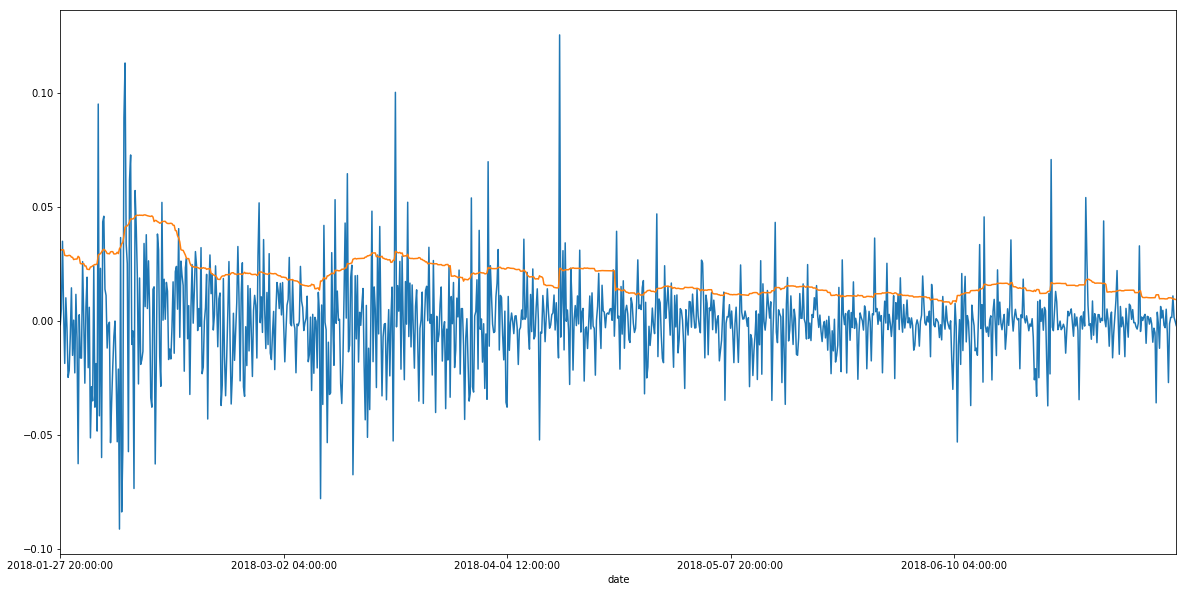

In [115]:
x=retrieve_symbol_name('USDT_BTC')
x['rolling']=x['BTC_change'].rolling(50).std()
x['BTC_change'].tail(1000).plot()
x['rolling'].tail(1000).plot(figsize=(20,10))
plt.show()

In [36]:
stats(ETC)

,count,mean,std,min,25%,50%,75%,max,Sharpe,Win%,Loss%,Avg_Win,Avg_Loss,Expected_value
T+1,165.0,-0.001423,0.040581,-0.106007,-0.024996,-0.005237,0.015841,0.105882,-0.035077,0.436364,0.563636,0.033212,-0.028238,-0.001423
T+5,165.0,0.017530,0.100898,-0.276555,-0.034798,0.005042,0.052288,0.530864,0.173738,0.533333,0.466667,0.079613,-0.053423,0.017530
T+30,165.0,0.015661,0.163942,-0.335653,-0.082259,-0.003201,0.099981,0.726736,0.095525,0.496970,0.503030,0.136378,-0.103602,0.015661
T+50,165.0,0.070850,0.322019,-0.506804,-0.129015,0.016543,0.205112,1.452802,0.220019,0.521212,0.478788,0.287089,-0.164549,0.070850


In [37]:
stats(ETC_18)

,count,mean,std,min,25%,50%,75%,max,Sharpe,Win%,Loss%,Avg_Win,Avg_Loss,Expected_value
T+1,57.0,-0.001671,0.032089,-0.068975,-0.019510,-0.000328,0.014447,0.079298,-0.052079,0.473684,0.526316,0.023210,-0.024064,-0.001671
T+5,57.0,-0.000170,0.063938,-0.131210,-0.029564,-0.000460,0.031297,0.172552,-0.002654,0.473684,0.526316,0.048093,-0.043606,-0.000170
T+30,57.0,-0.057489,0.141514,-0.335653,-0.144672,-0.042968,0.019333,0.424522,-0.406243,0.333333,0.666667,0.084313,-0.128390,-0.057489
T+50,57.0,-0.064459,0.237470,-0.506804,-0.217458,-0.049604,0.016543,0.865454,-0.271441,0.298246,0.701754,0.192704,-0.173754,-0.064459


In [38]:
stats(BTC_18)

,count,mean,std,min,25%,50%,75%,max,Sharpe,Win%,Loss%,Avg_Win,Avg_Loss,Expected_value
T+1,55.0,0.001814,0.024222,-0.054791,-0.006746,-0.000687,0.007481,0.112981,0.074892,0.436364,0.563636,0.019038,-0.011521,0.001814
T+5,55.0,0.006927,0.044549,-0.096833,-0.011690,0.002979,0.018241,0.180157,0.155481,0.563636,0.436364,0.030878,-0.024010,0.006927
T+30,55.0,-0.004267,0.077420,-0.214631,-0.051787,-0.011168,0.031677,0.249777,-0.055120,0.436364,0.563636,0.060781,-0.054627,-0.004267
T+50,55.0,-0.013391,0.148705,-0.207842,-0.107241,-0.045320,0.032689,0.647708,-0.090054,0.327273,0.672727,0.140137,-0.088081,-0.013391


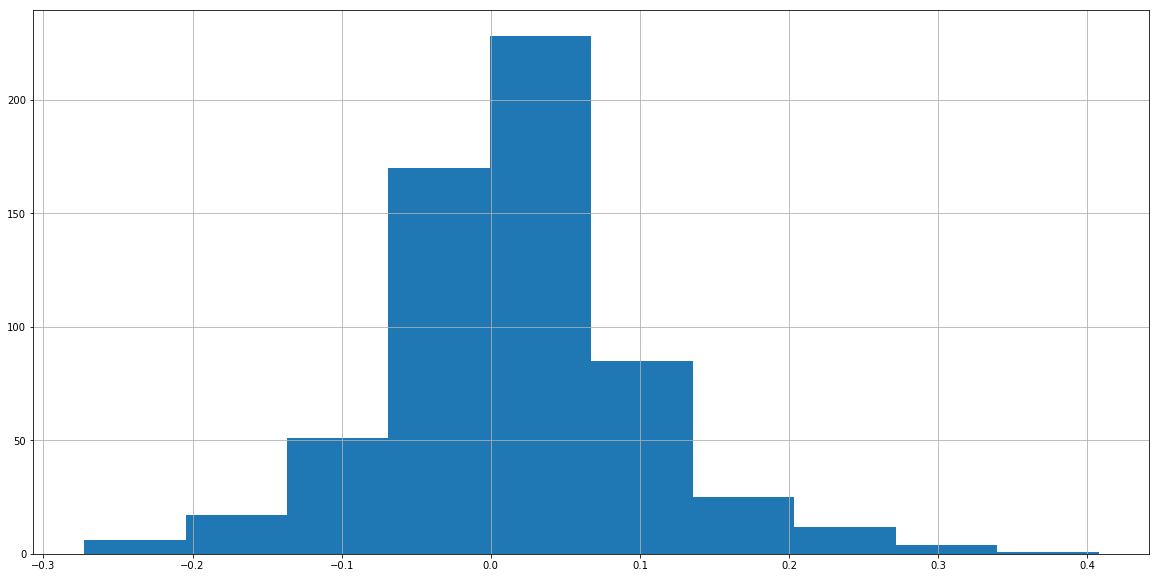

,close,T+1,T+5,T+30,T+50
date,,,,,
2015-02-21 16:00:00,245,0,-0.00408163,-0.0265306,0.0244898
2015-02-22 00:00:00,249,0,-0.0562249,-0.00160643,0.00803213
2015-02-24 12:00:00,238,0,-0.00105058,0.0546217,0.17647
2015-02-24 20:00:00,239.75,0,-0.00834202,0.0469239,0.0719499
2015-02-26 12:00:00,239.8,-0.00542118,0.0383653,0.0795455,0.0842369
2015-02-27 00:00:00,248.6,-0.0386163,0.00160901,0.0748994,0.0458568
2015-02-27 08:00:00,249,-0.0401606,-0.0361446,0.0396586,0.0441767
2015-03-01 08:00:00,251,0,0,0.0757052,0.0461753
2015-03-02 20:00:00,269,0,-0.0376394,-0.0334572,0.0371751


In [108]:
BTC['T+30'].hist(figsize=(20,10), bins=10)
plt.show()
BTC

In [109]:
def relative(coin,period):
    

,close,T+1,T+5,T+30,T+50
date,,,,,
2015-02-21 16:00:00,245,0,-0.00408163,-0.0265306,0.0244898
2015-02-22 00:00:00,249,0,-0.0562249,-0.00160643,0.00803213
2015-02-24 12:00:00,238,0,-0.00105058,0.0546217,0.17647
2015-02-24 20:00:00,239.75,0,-0.00834202,0.0469239,0.0719499
2015-02-26 12:00:00,239.8,-0.00542118,0.0383653,0.0795455,0.0842369
2015-02-27 00:00:00,248.6,-0.0386163,0.00160901,0.0748994,0.0458568
2015-02-27 08:00:00,249,-0.0401606,-0.0361446,0.0396586,0.0441767
2015-03-01 08:00:00,251,0,0,0.0757052,0.0461753
2015-03-02 20:00:00,269,0,-0.0376394,-0.0334572,0.0371751


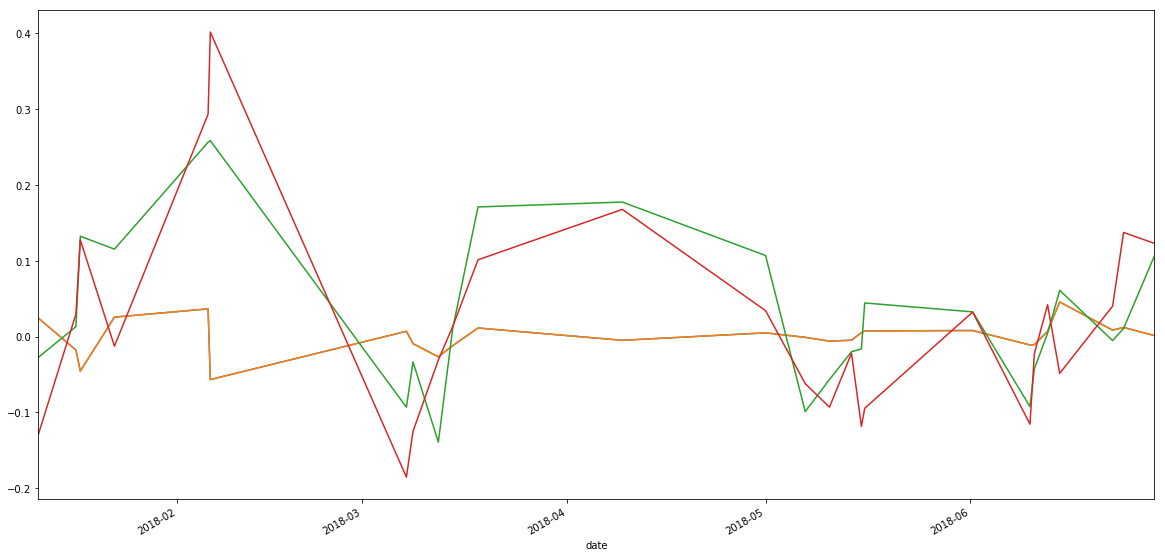

In [40]:
def plot(df):
    df['T+1'].plot(label='T+1')
    df['T+1'].plot(label='T+5')
    df['T+30'].plot(label='T+30')
    df['T+50'].plot(label='T+50',figsize=(20,10))
    plt.show()
plot(BTC_18)

In [134]:
btc=retrieve_symbol_name('USDT_BTC')
mod_dates(btc)
BTC_W=btc.asfreq('W').ffill()
def rolling(df,win):
    
    df['change']=df.iloc[:,0].pct_change()
    df['rolling']=df.iloc[:,-1].rolling(win).std()
    df.iloc[:,-2].plot()
    df.iloc[:,-1]=df.iloc[:,-1]
    df.iloc[:,-1].plot(figsize=(20,10))
    plt.show()
    return df

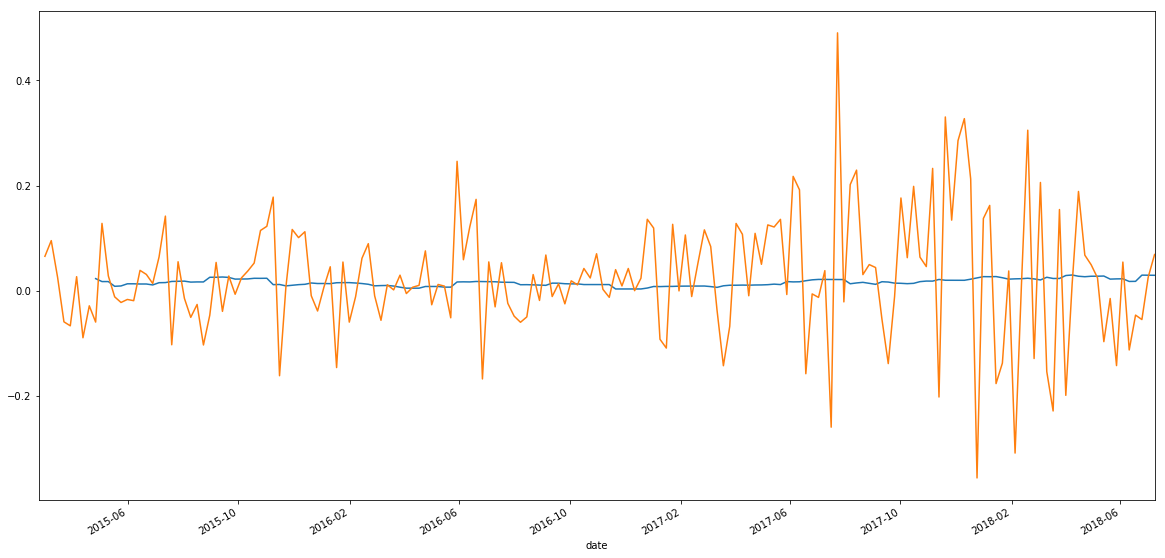

,BTC,BTC_change,rolling,change
date,,,,
2015-02-22 16:00:00,235.500000,-0.034836,NaN,NaN
2015-03-01 16:00:00,251.000000,0.000000,NaN,0.065817
2015-03-08 16:00:00,275.002000,0.057698,NaN,0.095625
2015-03-15 16:00:00,282.108000,0.025474,NaN,0.025840
2015-03-22 16:00:00,265.560831,0.001595,NaN,-0.058655
2015-03-29 16:00:00,247.969330,0.000000,NaN,-0.066243
2015-04-05 16:00:00,254.696222,0.009221,NaN,0.027128
2015-04-12 16:00:00,232.050000,0.000000,NaN,-0.088915
2015-04-19 16:00:00,225.500000,0.018059,NaN,-0.028227


In [135]:
rolling(BTC_W,10)

In [105]:
BTC_W

,BTC,BTC_change,rolling
date,,,
2015-02-22 16:00:00,235.500000,-0.034836,NaN
2015-03-01 16:00:00,251.000000,0.000000,NaN
2015-03-08 16:00:00,275.002000,0.057698,NaN
2015-03-15 16:00:00,282.108000,0.025474,NaN
2015-03-22 16:00:00,265.560831,0.001595,0.034262
2015-03-29 16:00:00,247.969330,0.000000,0.025216
2015-04-05 16:00:00,254.696222,0.009221,0.023973
2015-04-12 16:00:00,232.050000,0.000000,0.010876
2015-04-19 16:00:00,225.500000,0.018059,0.007857
